In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from fonctions_maison import *
plt.style.use(["science","notebook","grid"])

# Importation des données

In [2]:
N_ab, N_AB, N_aB, N_Ab = np.loadtxt("Données/S2.txt", delimiter="/", unpack = True, skiprows = 2) #où a=a, A=a', b=b, B=b'; i.e. a et b = vertical et A et B = horizontal
b_a0, N_a0 = np.loadtxt("Données/a-0.txt", unpack = True, skiprows = 2)
b_a45, N_a45 = np.loadtxt("Données/a-45.txt", unpack = True, skiprows = 2)
b_a90, N_a90 = np.loadtxt("Données/a-90.txt", unpack = True, skiprows = 2)
b_a135, N_a135 = np.loadtxt("Données/a-135.txt", unpack = True, skiprows = 2)
angle, N_0_a, N_0_b, N_0, N_45_a, N_45_b, N_45, N_225_a, N_225_b, N_225 = np.loadtxt("Données/data1.txt", unpack = True)

# Nos données

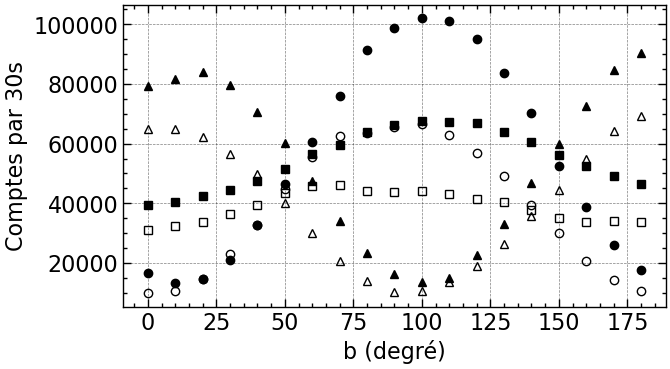

In [3]:
plt.figure(0, figsize=(7,4), dpi=100)
plt.xlabel("b (degré)")
plt.ylabel("Comptes par 30s")

plt.plot(angle, N_0_a, ls="none", marker="^", mec="black", mfc="none")
plt.plot(angle, N_0_b, ls="none", marker="^", mec="black", mfc="black", label="0°")
plt.plot(angle, N_45_a, ls="none", marker="o", mec="black", mfc="none")
plt.plot(angle, N_45_b, ls="none", marker="o", mec="black", mfc="black", label="45°")
plt.plot(angle, N_225_a, ls="none", marker="s", mec="black", mfc="none")
plt.plot(angle, N_225_b, ls="none", marker="s", mec="black", mfc="black", label="22.5°")

plt.savefig("comptes_a_b", bbox_inches="tight")

# 4 Courbes de $\beta$ en fct de $\alpha$

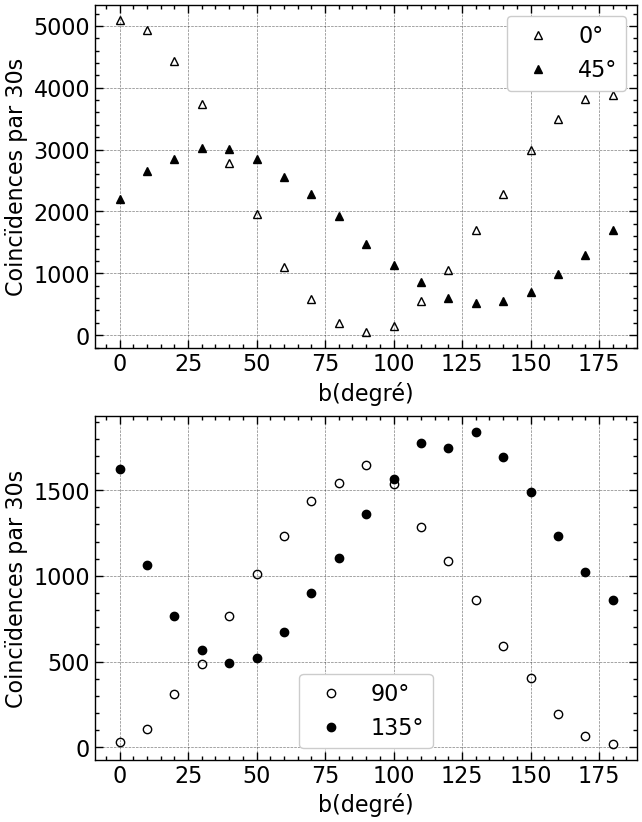

In [4]:
fig, axes = plt.subplots(2,figsize=(7,10) , dpi=100)
ax1, ax2 = axes[0], axes[1]

ax1.set_xlabel("b(degré)")
ax1.set_ylabel("Coincïdences par 30s")
ax2.set_xlabel("b(degré)")
ax2.set_ylabel("Coincïdences par 30s")

ax1.plot(b_a0, N_a0, ls="none", marker="^", mec="black", mfc="none", label="0°")
ax1.plot(b_a45, N_a45, ls="none", marker="^", mec="black", mfc="black", label="45°")
ax1.legend()
ax2.plot(b_a90, N_a90, ls="none", marker="o", mec="black", mfc="none", label="90°")
ax2.plot(b_a135, N_a135, ls="none", marker="o", mec="black", mfc="black", label="135°")

ax2.legend()
plt.show()

### `Curve_fit` de $N(\alpha, \beta)$

In [3]:
from scipy.optimize import curve_fit

####Fonction à optimiser
#a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
def Nb_coincidences(b, A, theta, phi, C):
    return A*((np.sin(a)**2)*(np.sin(b)**2)*(np.cos(theta)**2)
              + (np.cos(a)**2)*(np.cos(b)**2)*(np.sin(theta)**2)
              + (1/4)*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi)) + C

$\alpha = 0^o$ et $\alpha = 45^o$

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


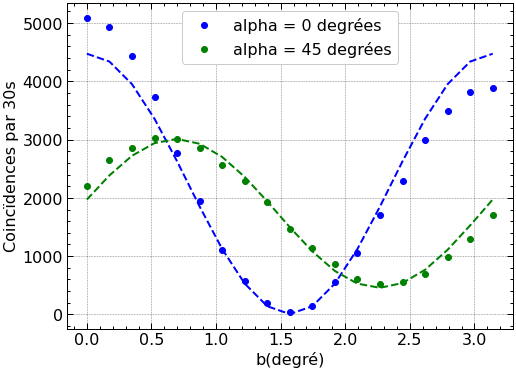

In [7]:
b_a0, N_a0 = np.loadtxt("Données/a-0.txt", unpack = True, skiprows = 2)
b_a45, N_a45 = np.loadtxt("Données/a-45.txt", unpack = True, skiprows = 2)

b_a0 *= np.pi/180
a = 0 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a0_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a0_popt = curve_fit(Nb_coincidences, b_a0, N_a0, a0_guess)

A, theta, phi, C = a0_popt[0]
y_fit_0 = Nb_coincidences(b_a0, A, theta, phi, C)


b_a45 *= np.pi/180
a = 45 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a45_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a45_popt = curve_fit(Nb_coincidences, b_a45, N_a45, a45_guess)

A, theta, phi, C = a45_popt[0]
y_fit_45 = Nb_coincidences(b_a45, A, theta, phi, C)

plt.plot(b_a0,N_a0,"bo",label="alpha = 0 degrées")
plt.plot(b_a0,y_fit_0,"b--")
plt.plot(b_a45,N_a45,"go",label="alpha = 45 degrées")
plt.plot(b_a45,y_fit_45,"g--")
plt.xlabel("b(degré)")
plt.ylabel("Coincïdences par 30s")
plt.legend()
plt.show()

$\alpha = 45^o$ et $\alpha = 135^o$

c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


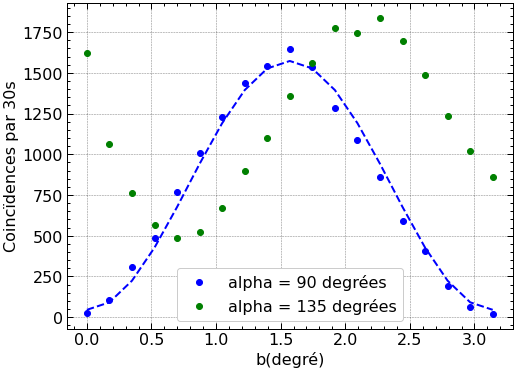

In [61]:
b_a90, N_a90 = np.loadtxt("Données/a-90.txt", unpack = True, skiprows = 2)
b_a135, N_a135 = np.loadtxt("Données/a-135.txt", unpack = True, skiprows = 2)

b_a90 *= np.pi/180
a = 90 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a90_guess = [5560,46 * (np.pi/180),26 * (np.pi/180),22]
a90_popt = curve_fit(Nb_coincidences, b_a90, N_a90, a90_guess)

A, theta, phi, C = a90_popt[0]
y_fit_45 = Nb_coincidences(b_a90, A, theta, phi, C)

b_a135 *= np.pi/180
a = 90 * (np.pi/180) # à changer pour le calcul de chaque curve_fit 
a135_guess = [89922 ,325.86* (np.pi/180),132.32 * (np.pi/180),12119]
a135_popt = curve_fit(Nb_coincidences, b_a135, N_a135, a135_guess)

A, theta, phi, C = a135_popt[0]
y_fit_135 = Nb_coincidences(b_a135, A, theta, phi, C)

plt.plot(b_a90,N_a90,"bo",label="alpha = 90 degrées")
plt.plot(b_a90,y_fit_45,"b--")
plt.plot(b_a135,N_a135,"go",label="alpha = 135 degrées")
#plt.plot(b_a135,y_fit_135,"g--")
plt.xlabel("b(degré)")
plt.ylabel("Coincïdences par 30s")
plt.legend()
plt.show()

# 2 Courbes pour S

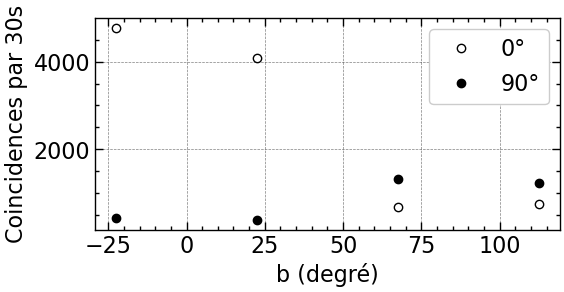

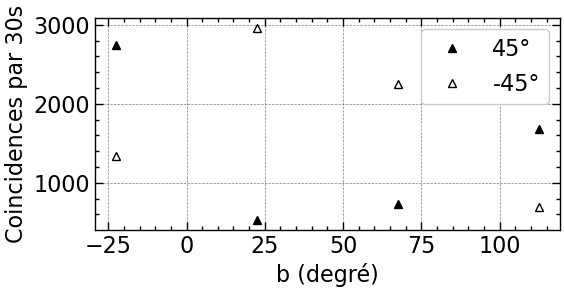

In [6]:
b = np.array([-22.5, 22.5, 67.5, 112.5])
N_moins_45 = np.array([N_ab[1], N_ab[0], N_aB[1], N_aB[0]])
N_0 = np.array(       [N_ab[3], N_ab[2], N_aB[3], N_aB[2]])
N_45 = np.array(      [N_Ab[1], N_Ab[0], N_AB[1], N_AB[0]])
N_90 = np.array(      [N_Ab[3], N_Ab[2], N_AB[3], N_AB[2]])

E_ab = ( N_ab[0] + N_AB[0] - N_aB[0] - N_Ab[0] ) / ( N_ab[0] + N_AB[0] + N_aB[0] + N_Ab[0] )
E_aB = ( N_ab[1] + N_AB[1] - N_aB[1] - N_Ab[1] ) / ( N_ab[1] + N_AB[1] + N_aB[1] + N_Ab[1] )
E_Ab = ( N_ab[2] + N_AB[2] - N_aB[2] - N_Ab[2] ) / ( N_ab[2] + N_AB[2] + N_aB[2] + N_Ab[2] )
E_AB = ( N_ab[3] + N_AB[3] - N_aB[3] - N_Ab[3] ) / ( N_ab[3] + N_AB[3] + N_aB[3] + N_Ab[3] )
S = E_ab - E_aB + E_Ab + E_AB

plt.figure(2 ,figsize=(6,2.8) , dpi=100)
plt.xlabel("b (degré)")
plt.ylabel("Coincidences par 30s")

plt.plot(b, N_0, ls="none", marker="o", mec="black", mfc="none", label="0°")
plt.plot(b, N_90, ls="none", marker="o", mec="black", mfc="black", label="90°")

plt.legend()

plt.savefig("S_0_90", bbox_inches="tight")

plt.figure(3 ,figsize=(6,2.8) , dpi=100)
plt.xlabel("b (degré)")
plt.ylabel("Coincidences par 30s")

plt.plot(b, N_45, ls="none", marker="^", mec="black", mfc="black", label="45°")
plt.plot(b, N_moins_45, ls="none", marker="^", mec="black", mfc="none", label="-45°")

plt.legend()

plt.savefig("S_45_45", bbox_inches="tight")

In [21]:
2*522*(1/2.0839)

500.9837324247805